we are going to invest the best market to advertise the products

In [5]:
import pandas as pd
fcc = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv",dtype = object)

In [6]:
fcc.shape

(18175, 136)

In [7]:
print(fcc.head(5))

  Age AttendedBootcamp BootcampFinish BootcampLoanYesNo BootcampName  \
0  27                0            NaN               NaN          NaN   
1  34                0            NaN               NaN          NaN   
2  21                0            NaN               NaN          NaN   
3  26                0            NaN               NaN          NaN   
4  20                0            NaN               NaN          NaN   

  BootcampRecommend ChildrenNumber                 CityPopulation  \
0               NaN            NaN            more than 1 million   
1               NaN            NaN              less than 100,000   
2               NaN            NaN            more than 1 million   
3               NaN            NaN  between 100,000 and 1 million   
4               NaN            NaN  between 100,000 and 1 million   

  CodeEventConferences CodeEventDjangoGirls         ...         YouTubeFCC  \
0                  NaN                  NaN         ...                NaN

In [8]:
fcc.JobRoleInterest.value_counts(normalize=True)

Full-Stack Web Developer                                                                                                                                                                                 0.117706
  Front-End Web Developer                                                                                                                                                                                0.064359
  Data Scientist                                                                                                                                                                                         0.021739
Back-End Web Developer                                                                                                                                                                                   0.020309
  Mobile Developer                                                                                                                                              

In [9]:
fcc.JobRoleInterest.str.contains("Web Developer"or"Mobile Developer").sum()

5776

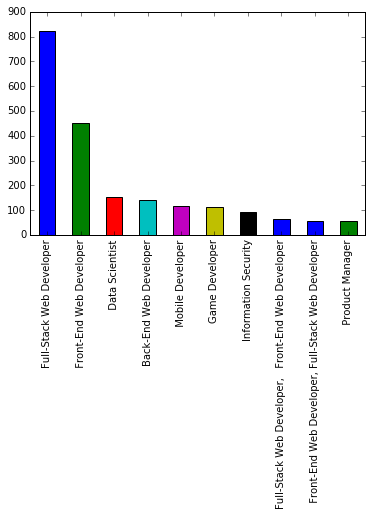

In [10]:
%matplotlib inline
import matplotlib
fcc.JobRoleInterest.value_counts()[:10].plot.bar()

In [11]:
fre_wm_dev = fcc.JobRoleInterest.str.contains("Web Developer"or"Mobile Developer").sum()/fcc.shape[0]
print(fre_wm_dev)

0.31779917469050895


In [12]:
sample = fcc[fcc.JobRoleInterest.notna()][["CountryLive","JobRoleInterest"]]

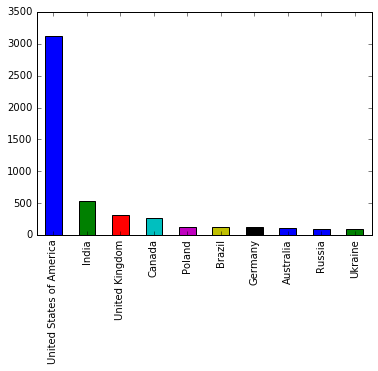

In [13]:
fre_abs =  sample.CountryLive.value_counts()
fre_rela = sample.CountryLive.value_counts(normalize = True)
fre_abs[:10].plot.bar()

In [14]:
fcc["MPM"]=fcc.MoneyForLearning.astype(float) / fcc.MonthsProgramming.astype(float)

In [15]:
fcc.MPM.isnull().sum()

2453

In [16]:
money_sample =fcc[fcc.MPM.notnull()]
money_country_sample = money_sample[money_sample.CountryLive.notnull()]

In [17]:
mean_sample =money_country_sample.groupby("CountryLive").mean().sort_values("MPM")


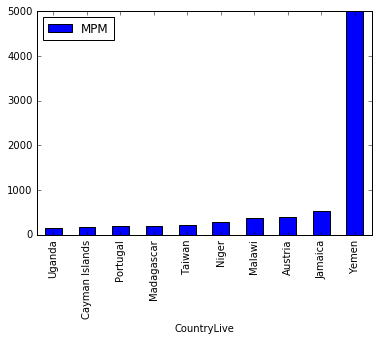

In [21]:
mean_sample[:139][-10:].plot.bar()

In [25]:
mean_sample.loc["India"]


MPM    inf
Name: India, dtype: float64

In [28]:
interests_no_nulls = fcc['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')
interests_no_nulls
splitted_interests

1                               [Full-Stack Web Developer]
2        [  Front-End Web Developer,  Back-End Web Deve...
3        [  Front-End Web Developer,  Full-Stack Web De...
4        [Full-Stack Web Developer,  Information Securi...
6                               [Full-Stack Web Developer]
9        [Full-Stack Web Developer,    Quality Assuranc...
11       [  DevOps / SysAdmin,    Data Scientist,  Info...
13       [Back-End Web Developer,  Full-Stack Web Devel...
14                              [Full-Stack Web Developer]
15                              [Full-Stack Web Developer]
16                              [Full-Stack Web Developer]
18       [Full-Stack Web Developer,    Front-End Web De...
19       [  Front-End Web Developer,    Mobile Develope...
21                                  [Information Security]
22                              [Full-Stack Web Developer]
23                                [Back-End Web Developer]
28                              [Full-Stack Web Develope

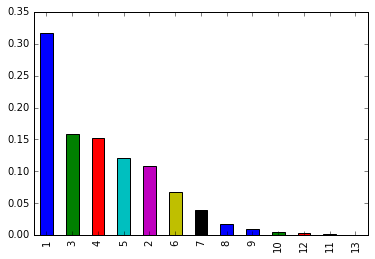

In [31]:
n_of_options = splitted_interests.apply(lambda x: len(x))
n_of_options.value_counts(normalize=True).plot.bar()

In [32]:
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


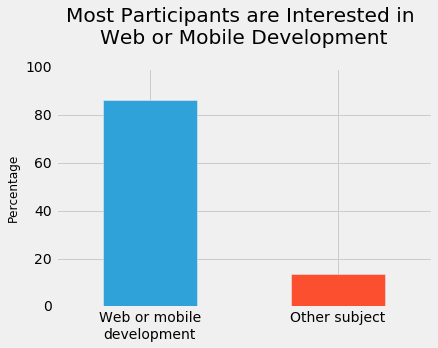

In [35]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

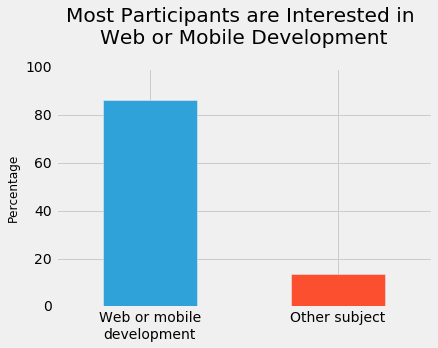

In [41]:
import matplotlib.pyplot as plt

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()